<a href="https://colab.research.google.com/github/verneh/pytorch/blob/main/linearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torch import nn

import matplotlib.pyplot as plt 
import torch
torch.__version__

'1.12.1+cu113'

In [3]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
# Create *known* parameters
weight = 0.9
bias = 0.3

# Create data
start = 0
end = 1
step = 0.005

# without unsqueeze, errors will happen later on (shapes within linear layers)
X = torch.arange(start, end, step).unsqueeze(dim=1)

# Simple equation.
y = weight * X + bias

# datapoints
X[:100], y[:100]

(tensor([[0.0000],
         [0.0050],
         [0.0100],
         [0.0150],
         [0.0200],
         [0.0250],
         [0.0300],
         [0.0350],
         [0.0400],
         [0.0450],
         [0.0500],
         [0.0550],
         [0.0600],
         [0.0650],
         [0.0700],
         [0.0750],
         [0.0800],
         [0.0850],
         [0.0900],
         [0.0950],
         [0.1000],
         [0.1050],
         [0.1100],
         [0.1150],
         [0.1200],
         [0.1250],
         [0.1300],
         [0.1350],
         [0.1400],
         [0.1450],
         [0.1500],
         [0.1550],
         [0.1600],
         [0.1650],
         [0.1700],
         [0.1750],
         [0.1800],
         [0.1850],
         [0.1900],
         [0.1950],
         [0.2000],
         [0.2050],
         [0.2100],
         [0.2150],
         [0.2200],
         [0.2250],
         [0.2300],
         [0.2350],
         [0.2400],
         [0.2450],
         [0.2500],
         [0.2550],
         [0.

In [5]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

In [6]:
# Function definition.
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

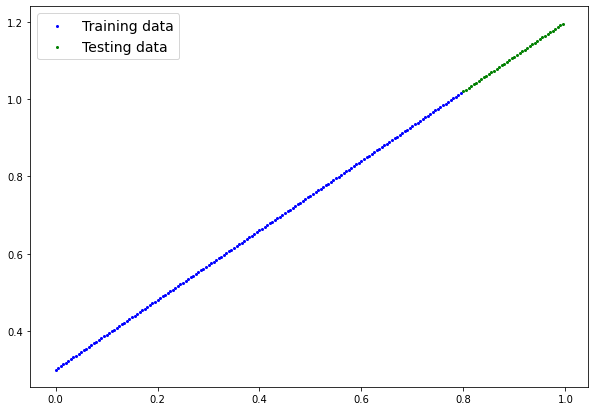

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

In [8]:
# Subcless nn.Module

class LinearRegressionModel(nn.Module):
    def __init__(self):
      super().__init__()
      self.weight = nn.Parameter(data=torch.randn(1, 
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))
    
      self.bias = nn.Parameter(data=torch.randn(1, 
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))

    def forward(self, x):
      return self.weight * x + self.bias

  ## Option 2 (same as above instead using nn.Linear())
# class LinearRegressionModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.linear_layer = nn.Linear(in_features=1, 
#                                   out_features=1)
  
#   def forward(self, x):
#     return self.linear_layer(x)

In [9]:
# Instantiate the model
model = LinearRegressionModel().to(device)
model

LinearRegressionModel()

In [10]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [11]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300

# Send data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Model in train mode
  model.train()

  # 1. Forward pass
  y_preds = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_preds, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context 
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model(X_test)
      # 2. Calculate loss
      test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 2.354 | Test loss: 2.952
Epoch: 20 | Train loss: 2.123 | Test loss: 2.681
Epoch: 40 | Train loss: 1.891 | Test loss: 2.410
Epoch: 60 | Train loss: 1.660 | Test loss: 2.138
Epoch: 80 | Train loss: 1.428 | Test loss: 1.867
Epoch: 100 | Train loss: 1.196 | Test loss: 1.596
Epoch: 120 | Train loss: 0.965 | Test loss: 1.324
Epoch: 140 | Train loss: 0.733 | Test loss: 1.053
Epoch: 160 | Train loss: 0.502 | Test loss: 0.782
Epoch: 180 | Train loss: 0.270 | Test loss: 0.510
Epoch: 200 | Train loss: 0.103 | Test loss: 0.284
Epoch: 220 | Train loss: 0.075 | Test loss: 0.194
Epoch: 240 | Train loss: 0.067 | Test loss: 0.161
Epoch: 260 | Train loss: 0.060 | Test loss: 0.141
Epoch: 280 | Train loss: 0.054 | Test loss: 0.125


In [12]:
# Make predictions with the model
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)
y_preds[:10]

tensor([[0.9329],
        [0.9362],
        [0.9396],
        [0.9429],
        [0.9463],
        [0.9496],
        [0.9529],
        [0.9563],
        [0.9596],
        [0.9629]])

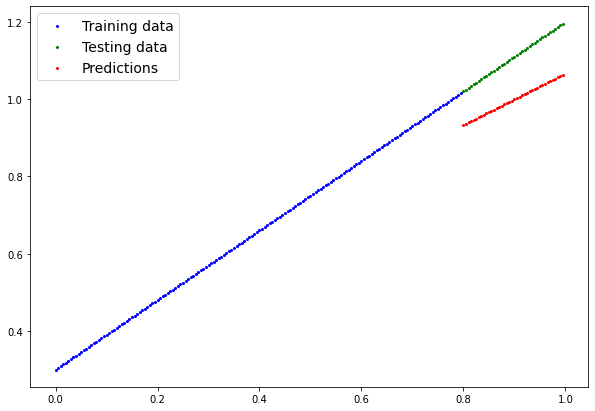

In [13]:
# Plot the predictions
plot_predictions(predictions=y_preds.cpu());

In [14]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "lr_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/lr_model.pth


In [15]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegressionModel()

In [16]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()
with torch.inference_mode():
  loaded_preds = loaded_model(X_test)
y_preds == loaded_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])